In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import keras
from  keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import os
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [3]:
df_train=pd.read_csv('/content/drive/MyDrive/feeling/open/train.csv')

In [4]:
df_train

,ID,Utterance,Speaker,Dialogue_ID,Target
0,TRAIN_0000,also I was the point person on my company’s tr...,Chandler,0,neutral
1,TRAIN_0001,You must’ve had your hands full.,The Interviewer,0,neutral
2,TRAIN_0002,That I did. That I did.,Chandler,0,neutral
3,TRAIN_0003,So let’s talk a little bit about your duties.,The Interviewer,0,neutral
4,TRAIN_0004,My duties? All right.,Chandler,0,surprise
...,...,...,...,...,...
9984,TRAIN_9984,You or me?,Chandler,1038,neutral
9985,TRAIN_9985,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,1038,neutral
9986,TRAIN_9986,"You guys are messing with me, right?",Joey,1038,surprise
9987,TRAIN_9987,Yeah.,All,1038,neutral


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           9989 non-null   object
 1   Utterance    9989 non-null   object
 2   Speaker      9989 non-null   object
 3   Dialogue_ID  9989 non-null   int64 
 4   Target       9989 non-null   object
dtypes: int64(1), object(4)
memory usage: 390.3+ KB


In [6]:
df_train['Target'].value_counts()

neutral     4710
joy         1743
surprise    1205
anger       1109
sadness      683
disgust      271
fear         268
Name: Target, dtype: int64

In [7]:
df_train=df_train[["Utterance","Target"]]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Utterance  9989 non-null   object
 1   Target     9989 non-null   object
dtypes: object(2)
memory usage: 156.2+ KB


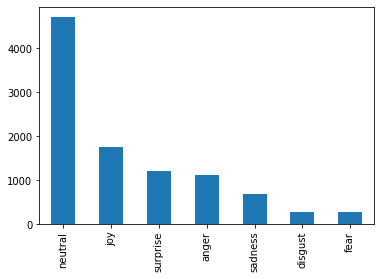

In [8]:
df_train['Target'].value_counts().plot(kind='bar')

대다수가 netral인 상황 

In [9]:
df_txtTrain = pd.read_csv('/content/drive/MyDrive/feeling/open/train.txt',sep=";")

In [10]:
df_txtTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Utterance  16000 non-null  object
 1   Target     16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [11]:
df_txtTrain

,Utterance,Target
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [12]:
df_txtTrain['Target'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Target, dtype: int64

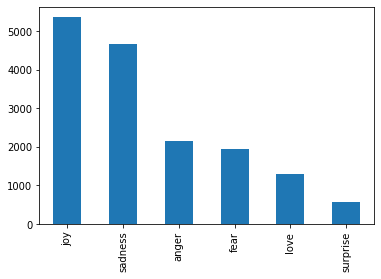

In [13]:
df_txtTrain['Target'].value_counts().plot(kind='bar')

In [14]:
result_train = pd.concat([df_txtTrain,df_train])
result_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25989 entries, 0 to 9988
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Utterance  25989 non-null  object
 1   Target     25989 non-null  object
dtypes: object(2)
memory usage: 609.1+ KB


In [15]:
result_train['Target'].value_counts()

joy         7105
sadness     5349
neutral     4710
anger       3268
fear        2205
surprise    1777
love        1304
disgust      271
Name: Target, dtype: int64

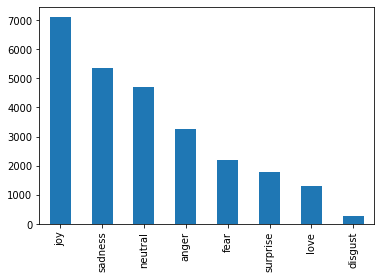

In [16]:
result_train['Target'].value_counts().plot(kind='bar')

In [17]:
!pip install wordcloud #stopword

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

In [19]:
tokens = re.findall("[\w']+", result_train['Utterance'].str.lower().str.cat(sep=' ')) 

In [20]:
tokens

['i',
 'didnt',
 'feel',
 'humiliated',
 'i',
 'can',
 'go',
 'from',
 'feeling',
 'so',
 'hopeless',
 'to',
 'so',
 'damned',
 'hopeful',
 'just',
 'from',
 'being',
 'around',
 'someone',
 'who',
 'cares',
 'and',
 'is',
 'awake',
 'im',
 'grabbing',
 'a',
 'minute',
 'to',
 'post',
 'i',
 'feel',
 'greedy',
 'wrong',
 'i',
 'am',
 'ever',
 'feeling',
 'nostalgic',
 'about',
 'the',
 'fireplace',
 'i',
 'will',
 'know',
 'that',
 'it',
 'is',
 'still',
 'on',
 'the',
 'property',
 'i',
 'am',
 'feeling',
 'grouchy',
 'ive',
 'been',
 'feeling',
 'a',
 'little',
 'burdened',
 'lately',
 'wasnt',
 'sure',
 'why',
 'that',
 'was',
 'ive',
 'been',
 'taking',
 'or',
 'milligrams',
 'or',
 'times',
 'recommended',
 'amount',
 'and',
 'ive',
 'fallen',
 'asleep',
 'a',
 'lot',
 'faster',
 'but',
 'i',
 'also',
 'feel',
 'like',
 'so',
 'funny',
 'i',
 'feel',
 'as',
 'confused',
 'about',
 'life',
 'as',
 'a',
 'teenager',
 'or',
 'as',
 'jaded',
 'as',
 'a',
 'year',
 'old',
 'man',
 'i',

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
en_stops = set(stopwords.words('english'))

filtered_sentence = [token for token in tokens if not token in en_stops]
filtered_sentence  #stopword 처리 수행

['didnt',
 'feel',
 'humiliated',
 'go',
 'feeling',
 'hopeless',
 'damned',
 'hopeful',
 'around',
 'someone',
 'cares',
 'awake',
 'im',
 'grabbing',
 'minute',
 'post',
 'feel',
 'greedy',
 'wrong',
 'ever',
 'feeling',
 'nostalgic',
 'fireplace',
 'know',
 'still',
 'property',
 'feeling',
 'grouchy',
 'ive',
 'feeling',
 'little',
 'burdened',
 'lately',
 'wasnt',
 'sure',
 'ive',
 'taking',
 'milligrams',
 'times',
 'recommended',
 'amount',
 'ive',
 'fallen',
 'asleep',
 'lot',
 'faster',
 'also',
 'feel',
 'like',
 'funny',
 'feel',
 'confused',
 'life',
 'teenager',
 'jaded',
 'year',
 'old',
 'man',
 'petronas',
 'years',
 'feel',
 'petronas',
 'performed',
 'well',
 'made',
 'huge',
 'profit',
 'feel',
 'romantic',
 'feel',
 'like',
 'make',
 'suffering',
 'seeing',
 'mean',
 'something',
 'feel',
 'running',
 'divine',
 'experience',
 'expect',
 'type',
 'spiritual',
 'encounter',
 'think',
 'easiest',
 'time',
 'year',
 'feel',
 'dissatisfied',
 'feel',
 'low',
 'energy',


In [23]:
text = list(set(filtered_sentence))

In [24]:
df_test=pd.read_csv("/content/drive/MyDrive/feeling/open/test.txt",sep=";")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Utterance  2000 non-null   object
 1   Target     2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [25]:
df_val=pd.read_csv("/content/drive/MyDrive/feeling/open/val.txt",sep=";")
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Utterance  2000 non-null   object
 1   Target     2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


데이터 전저리

In [26]:
nltk.download("punkt")
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
token_sentence =[]

for s in result_train["Utterance"]:
  word_token = word_tokenize(s)
  token_sentence.append(word_token)

result_train["token_sentence"]=token_sentence
result_train=result_train.reset_index(drop=True)
result_train

,Utterance,Target,token_sentence
0,i didnt feel humiliated,sadness,"[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,"[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,anger,"[im, grabbing, a, minute, to, post, i, feel, g..."
3,i am ever feeling nostalgic about the fireplac...,love,"[i, am, ever, feeling, nostalgic, about, the, ..."
4,i am feeling grouchy,anger,"[i, am, feeling, grouchy]"
...,...,...,...
25984,You or me?,neutral,"[You, or, me, ?]"
25985,"I got it. Uh, Joey, women don't have Adam's ap...",neutral,"[I, got, it, ., Uh, ,, Joey, ,, women, do, n't..."
25986,"You guys are messing with me, right?",surprise,"[You, guys, are, messing, with, me, ,, right, ?]"
25987,Yeah.,neutral,"[Yeah, .]"


stopword 제거

In [28]:
filtered_sentence =[]

stop_words = set(stopwords.words("english"))

for s in result_train["token_sentence"]:
  word_token = [word for word in s if not word in stop_words]
  filtered_sentence.append(word_token)

filtered_sentence

[['didnt', 'feel', 'humiliated'],
 ['go',
  'feeling',
  'hopeless',
  'damned',
  'hopeful',
  'around',
  'someone',
  'cares',
  'awake'],
 ['im', 'grabbing', 'minute', 'post', 'feel', 'greedy', 'wrong'],
 ['ever', 'feeling', 'nostalgic', 'fireplace', 'know', 'still', 'property'],
 ['feeling', 'grouchy'],
 ['ive', 'feeling', 'little', 'burdened', 'lately', 'wasnt', 'sure'],
 ['ive',
  'taking',
  'milligrams',
  'times',
  'recommended',
  'amount',
  'ive',
  'fallen',
  'asleep',
  'lot',
  'faster',
  'also',
  'feel',
  'like',
  'funny'],
 ['feel', 'confused', 'life', 'teenager', 'jaded', 'year', 'old', 'man'],
 ['petronas',
  'years',
  'feel',
  'petronas',
  'performed',
  'well',
  'made',
  'huge',
  'profit'],
 ['feel', 'romantic'],
 ['feel', 'like', 'make', 'suffering', 'seeing', 'mean', 'something'],
 ['feel',
  'running',
  'divine',
  'experience',
  'expect',
  'type',
  'spiritual',
  'encounter'],
 ['think', 'easiest', 'time', 'year', 'feel', 'dissatisfied'],
 ['fe

stemming

In [29]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [30]:
stemming_sentence =[]

for s in filtered_sentence:
  word_token = [stemmer.stem(word) for word in s]
  stemming_sentence.append(word_token)

stemming_sentence

[['didnt', 'feel', 'humili'],
 ['go',
  'feel',
  'hopeless',
  'damn',
  'hope',
  'around',
  'someon',
  'care',
  'awak'],
 ['im', 'grab', 'minut', 'post', 'feel', 'greedi', 'wrong'],
 ['ever', 'feel', 'nostalg', 'fireplac', 'know', 'still', 'properti'],
 ['feel', 'grouchi'],
 ['ive', 'feel', 'littl', 'burden', 'late', 'wasnt', 'sure'],
 ['ive',
  'take',
  'milligram',
  'time',
  'recommend',
  'amount',
  'ive',
  'fallen',
  'asleep',
  'lot',
  'faster',
  'also',
  'feel',
  'like',
  'funni'],
 ['feel', 'confus', 'life', 'teenag', 'jade', 'year', 'old', 'man'],
 ['petrona',
  'year',
  'feel',
  'petrona',
  'perform',
  'well',
  'made',
  'huge',
  'profit'],
 ['feel', 'romant'],
 ['feel', 'like', 'make', 'suffer', 'see', 'mean', 'someth'],
 ['feel', 'run', 'divin', 'experi', 'expect', 'type', 'spiritu', 'encount'],
 ['think', 'easiest', 'time', 'year', 'feel', 'dissatisfi'],
 ['feel', 'low', 'energi', 'thirsti'],
 ['immens',
  'sympathi',
  'gener',
  'point',
  'possibl'

Bow

In [31]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token="UNK")
tokenizer.fit_on_texts(stemming_sentence)

padding

59


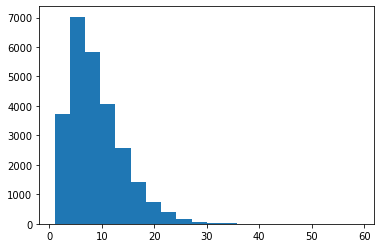

In [32]:
X_train = tokenizer.texts_to_sequences(stemming_sentence)

num_token_per_sentence =[len(sentence) for sentence in X_train]
print(max(num_token_per_sentence))

plt.hist(num_token_per_sentence,bins=20)
plt.show()

In [33]:
X_train_pad=pad_sequences(X_train,maxlen=59,padding="post")
X_train_pad

array([[ 110,    2,  729, ...,    0,    0,    0],
       [  12,    2,  496, ...,    0,    0,    0],
       [  10, 1175,  301, ...,    0,    0,    0],
       ...,
       [  45,   63,  986, ...,    0,    0,    0],
       [  33,    4,    0, ...,    0,    0,    0],
       [  72,   43,   21, ...,    0,    0,    0]], dtype=int32)

감정 라벨

In [34]:
#joy:0 sadness:1 neutral:2 anger:3 fear:4 surprise:5 love:6 disgust:7
result_train["Target"]=result_train["Target"].replace({"joy":0, "sadness":1, "neutral":2, "anger":3, "fear":4, "surprise":5, "love":6, "disgust":7})
result_train["Target"]

0        1
1        1
2        3
3        6
4        3
        ..
25984    2
25985    2
25986    5
25987    2
25988    0
Name: Target, Length: 25989, dtype: int64

In [35]:
result_train

,Utterance,Target,token_sentence
0,i didnt feel humiliated,1,"[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,1,"[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,3,"[im, grabbing, a, minute, to, post, i, feel, g..."
3,i am ever feeling nostalgic about the fireplac...,6,"[i, am, ever, feeling, nostalgic, about, the, ..."
4,i am feeling grouchy,3,"[i, am, feeling, grouchy]"
...,...,...,...
25984,You or me?,2,"[You, or, me, ?]"
25985,"I got it. Uh, Joey, women don't have Adam's ap...",2,"[I, got, it, ., Uh, ,, Joey, ,, women, do, n't..."
25986,"You guys are messing with me, right?",5,"[You, guys, are, messing, with, me, ,, right, ?]"
25987,Yeah.,2,"[Yeah, .]"


In [36]:
y_train = np.array(result_train["Target"].values)
y_train

array([1, 1, 3, ..., 5, 2, 0])

test,val 전처리

In [37]:
stemming_sentence_val = []
stemming_sentence_test = []

for sentence in df_val['Utterance']:
    word_token = word_tokenize(sentence)
    word_token = [stemmer.stem(word) for word in word_token if not word in stop_words]
    
    stemming_sentence_val.append(word_token)
    
for sentence in df_test['Utterance']:
    word_token = word_tokenize(sentence)
    word_token = [stemmer.stem(word) for word in word_token if not word in stop_words]
    
    stemming_sentence_test.append(word_token)

X_val=tokenizer.texts_to_sequences(stemming_sentence_val)
X_test=tokenizer.texts_to_sequences(stemming_sentence_test)

X_val_pad=pad_sequences(X_val,maxlen=59,padding='post')
X_test_pad=pad_sequences(X_test,maxlen=59,padding='post')

df_val['Target']=df_val['Target'].replace({"joy":0, "sadness":1, "neutral":2, "anger":3, "fear":4, "surprise":5, "love":6, "disgust":7})
df_test['Target']=df_test['Target'].replace({"joy":0, "sadness":1, "neutral":2, "anger":3, "fear":4, "surprise":5, "love":6, "disgust":7})

y_val = np.array(df_val['Target'].values)
y_test = np.array(df_test['Target'].values)

딥러닝 모델

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras.layers import LSTM, SimpleRNN, Dropout,Bidirectional
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam

In [39]:
sequence_length = 59 # max(num_token_per_sentence)
vocabulary_size = len(tokenizer.word_index)+1 # 10376
embedding_dim = 256

In [40]:
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_dim, input_length=sequence_length))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(128,return_sequences=True)))
model.add(Bidirectional(LSTM(128,return_sequences=True)))
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(32,activation="relu"))
model.add(Dense(8, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 59, 256)           3152896   
                                                                 
 dropout (Dropout)           (None, 59, 256)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 59, 256)          394240    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 59, 256)          394240    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 59, 128)          164352    
 nal)                                                            
                                                        

In [41]:
optimizer = Adam(learning_rate=0.01)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

In [42]:
history = model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=10, batch_size=50)

Epoch 1/10
520/520 [==============================] - 479s 884ms/step - loss: 1.6080 - accuracy: 0.3812 - val_loss: 1.5345 - val_accuracy: 0.3700
Epoch 2/10
520/520 [==============================] - 466s 897ms/step - loss: 1.3143 - accuracy: 0.4738 - val_loss: 1.1143 - val_accuracy: 0.5070
Epoch 3/10
520/520 [==============================] - 477s 918ms/step - loss: 1.0601 - accuracy: 0.6213 - val_loss: 0.6868 - val_accuracy: 0.7795
Epoch 4/10
520/520 [==============================] - 482s 927ms/step - loss: 0.8679 - accuracy: 0.7085 - val_loss: 0.4992 - val_accuracy: 0.8390
Epoch 5/10
520/520 [==============================] - 543s 1s/step - loss: 0.7632 - accuracy: 0.7407 - val_loss: 0.4664 - val_accuracy: 0.8485
Epoch 6/10
520/520 [==============================] - 501s 963ms/step - loss: 0.6942 - accuracy: 0.7677 - val_loss: 0.4192 - val_accuracy: 0.8705
Epoch 7/10
520/520 [==============================] - 497s 956ms/step - loss: 0.6614 - accuracy: 0.7787 - val_loss: 0.3620 - va

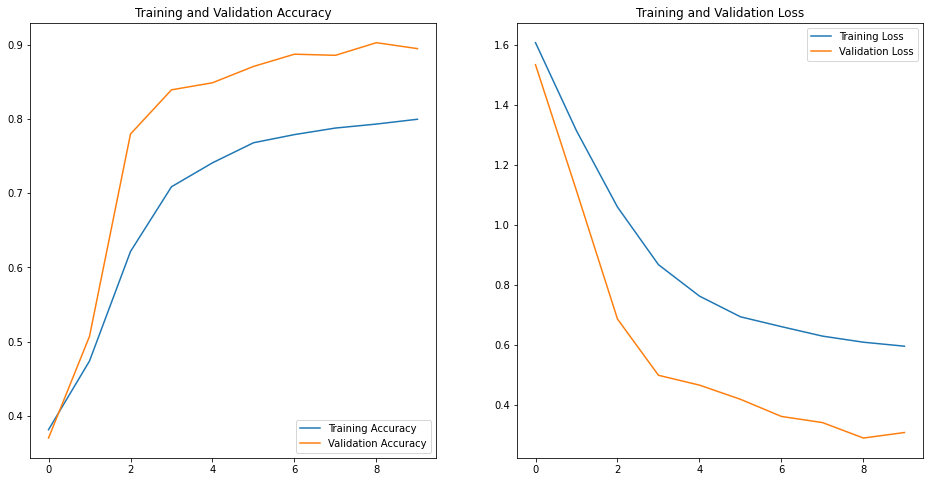

In [43]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)

print('test set accuracy: ', test_accuracy)

63/63 [==============================] - 16s 194ms/step - loss: 0.3261 - accuracy: 0.8850
test set accuracy:  0.8849999904632568


In [46]:
y_prob = model.predict(X_test_pad, verbose=0) 
predicted = y_prob.argmax(axis=-1)

In [51]:
for i in range(4,10): 
    #"joy":0, "sadness":1, "neutral":2, "anger":3, "fear":4, "surprise":5, "love":6, "disgust":7
    # 사용하였습니다.
    predicted
    print("{} 번째 테스트 데이터 문장: \n{}".format(i, result_train['Utterance'][i]))
    print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}\n".format(i, predicted[i], df_test['Target'][i]))

4 번째 테스트 데이터 문장: 
i am feeling grouchy
4 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1

5 번째 테스트 데이터 문장: 
ive been feeling a little burdened lately wasnt sure why that was
5 번째 테스트 데이터의 예측 결과: 4, 실제 데이터: 4

6 번째 테스트 데이터 문장: 
ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny
6 번째 테스트 데이터의 예측 결과: 2, 실제 데이터: 3

7 번째 테스트 데이터 문장: 
i feel as confused about life as a teenager or as jaded as a year old man
7 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0

8 번째 테스트 데이터 문장: 
i have been with petronas for years i feel that petronas has performed well and made a huge profit
8 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0

9 번째 테스트 데이터 문장: 
i feel romantic too
9 번째 테스트 데이터의 예측 결과: 3, 실제 데이터: 3

